In [1]:
# Import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator

simulator = AerSimulator()

In [2]:
π = np.pi
φ = Parameter('φ')

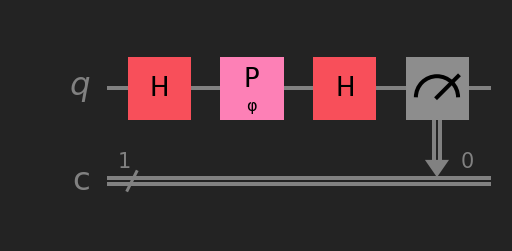

In [3]:
# define quantum circuit equivalent to double-slit experiment

qc = QuantumCircuit(1,1)
qc.h(0)
qc.p(φ,0)
qc.h(0)
qc.measure(0,0)
qc.draw()

In [4]:
# transpile to circuit that can be ran by simulator

qc_trans = transpile(qc, backend=simulator)

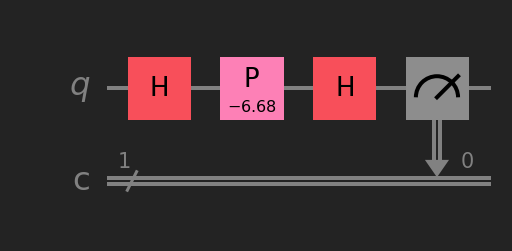

In [5]:
# Create list of circuits for different values of φ selected at random between ±φ_scrn/2

runs = 8192
φ_scrn = 6*π
φ_lst = np.random.uniform(-φ_scrn/2,φ_scrn/2,runs)

circuits = []

for φ_val in φ_lst:
    qc_sim = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_sim)
    
circuits[6].draw()

In [6]:
# Execute simulation

job = simulator.run(circuits, shots=1, memory=True)
sim_results = job.result()

In [7]:
# Post-process results: select values of φ where we measured a 0 (i.e., particle hit the screen)

φ_hit = []

for i, circ in enumerate(circuits):
    result = sim_results.get_memory(circ)[0]
    if result == '0':
        φ_hit.append(φ_lst[i])

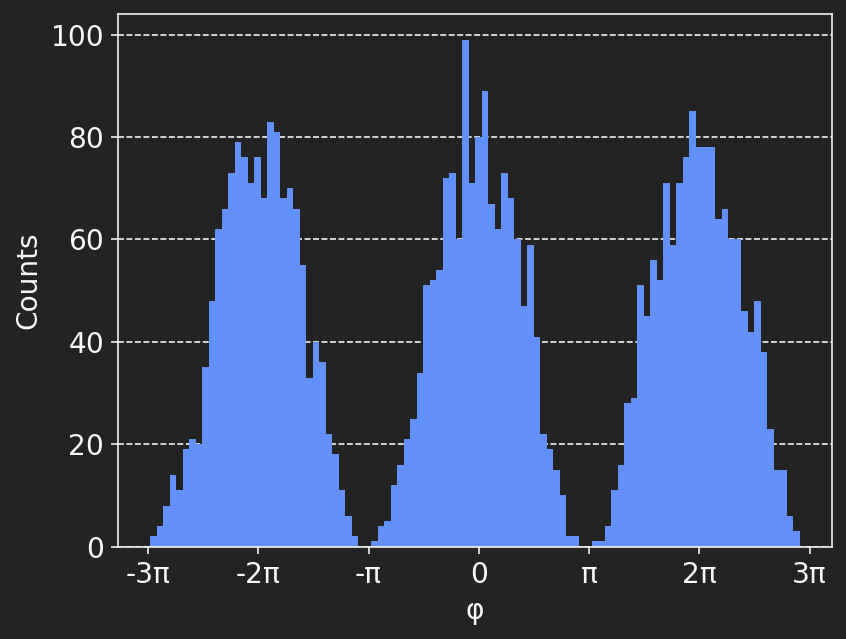

In [8]:
# Plot distribution of values φ where we measured a 0 (i.e., particle hit the screen)

ax = plt.subplot()
plt.hist(φ_hit, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [9]:
z_hit = np.random.uniform(-1,1,len(φ_hit))

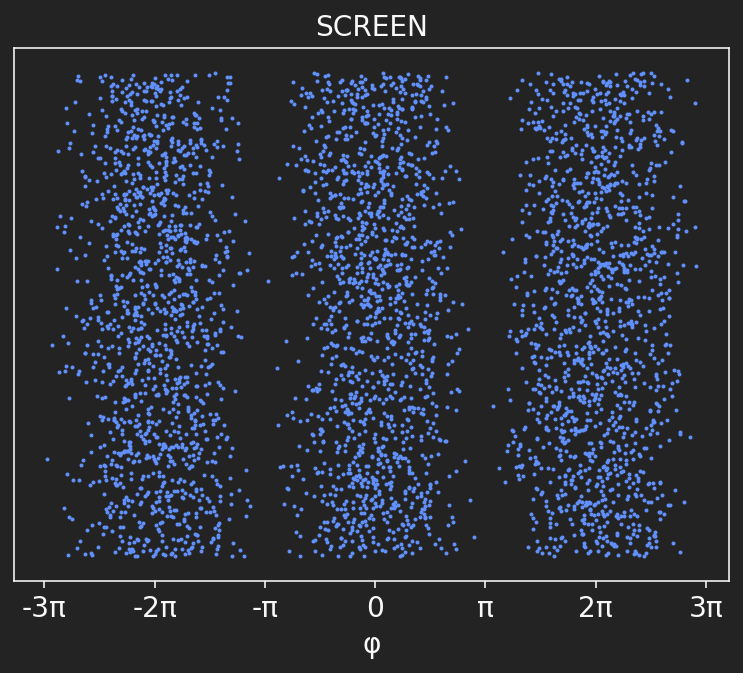

In [10]:
# Emulate hits on a screen. Values of z coordinate are selected at random

plt.scatter(φ_hit,z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

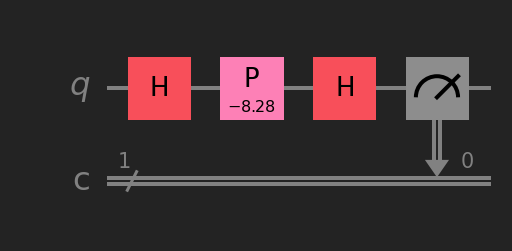

In [11]:
# Repeat experiment but using discrete steps of φ equal to φ_scrn/runs instead of randomly-picked values.

runs = 100
shots = 512
φ_scrn = 6*π
φ_lst = np.linspace(-φ_scrn/2,φ_scrn/2,runs)

circuits = []

for φ_val in φ_lst:
    qc_sim = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_sim)
    
circuits[6].draw()

In [12]:
# Execute simulation using a certain number of shots instead of only one shot

job = simulator.run(circuits, shots=shots)
sim_results = job.result()

In [13]:
# Post-process results: select values of φ where we measured a 0 (i.e., particle hit the screen)

φ_hit = []

for i, circ in enumerate(circuits):
    zero_counts = sim_results.get_counts(circ).get('0')
    
    if zero_counts is not None:
        φ_hit += zero_counts*[φ_lst[i]]

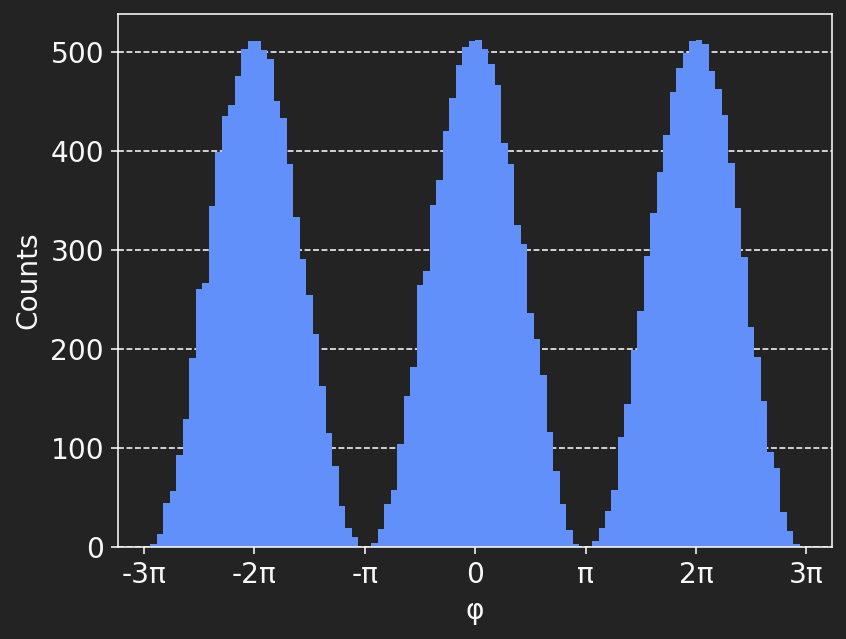

In [14]:
# Plot distribution of values φ where we measured a 0 (i.e., particle hit the screen)

ax = plt.subplot()
plt.hist(φ_hit, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [15]:
z_hit = np.random.uniform(-1,1,len(φ_hit))

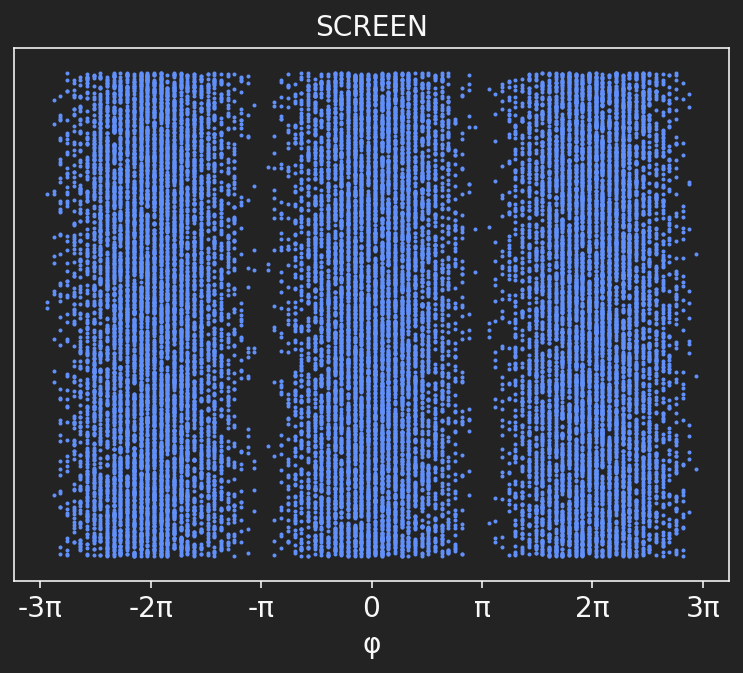

In [16]:
# Emulate hits on a screen. Values of z coordinate are selected at random

plt.scatter(φ_hit,z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

In [17]:
# Import functions necessary to execute experiment in real QPU

from qiskit_ibm_provider import IBMProvider, least_busy
from qiskit_ibm_provider.job import job_monitor

In [18]:
# Select QPU

provider = IBMProvider()

qpu = provider.get_backend('ibm_lagos')
print(qpu.name)

ibm_lagos


In [19]:
# transpile to circuit that can be ran by simulator

qc_trans = transpile(qc, backend=qpu)

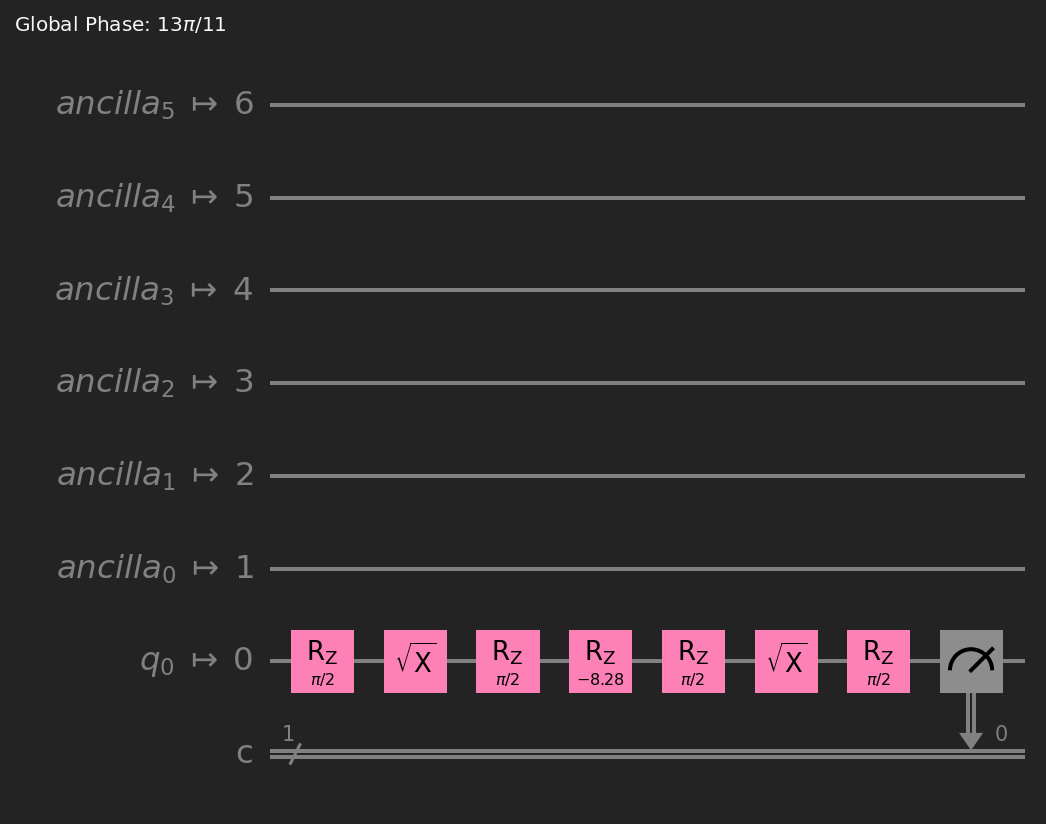

In [20]:
circuits = []

for φ_val in φ_lst:
    qc_sim = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_sim)
    
circuits[6].draw()

In [21]:
# Run circuits on QPU

job = qpu.run(circuits, shots=shots)
job_id = job.job_id()
print(job_id)

cn2cd3wp1am0008q78h0


In [22]:
# Check status of execution

retrieve_job = provider.retrieve_job(job_id)
retrieve_job.status()

<JobStatus.QUEUED: 'job is queued'>

In [24]:
# Extract results

qpu_results = job.result()

In [25]:
# Post-process results: select values of φ where we measured a 0 (i.e., particle hit the screen)

φ_hit = []

for i, circ in enumerate(circuits):
    zero_counts = qpu_results.get_counts(circ).get('0')
    
    if zero_counts is not None:
        φ_hit += zero_counts*[φ_lst[i]]

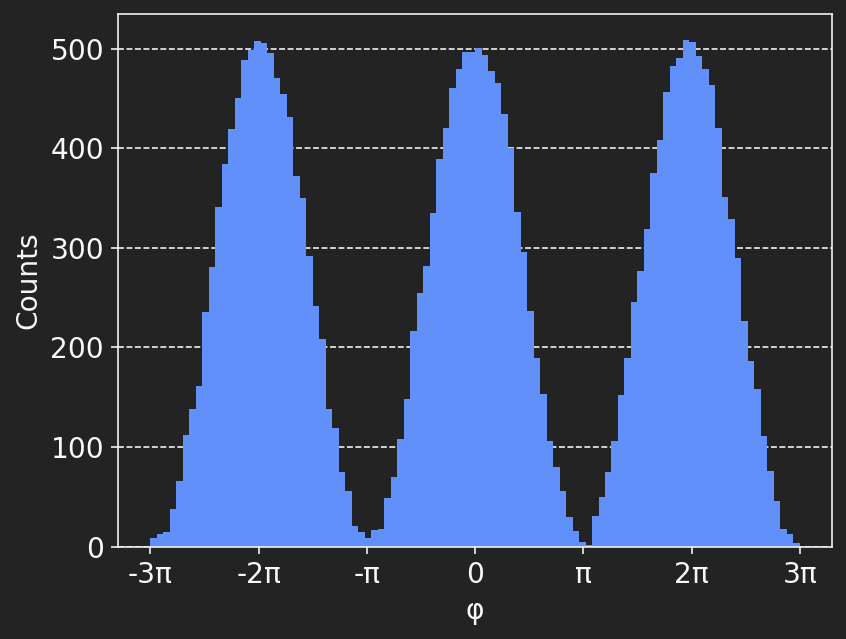

In [26]:
# Plot distribution of values φ where we measured a 0 (i.e., particle hit the screen)

ax = plt.subplot()
plt.hist(φ_hit, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [27]:
z_hit = np.random.uniform(-1,1,len(φ_hit))

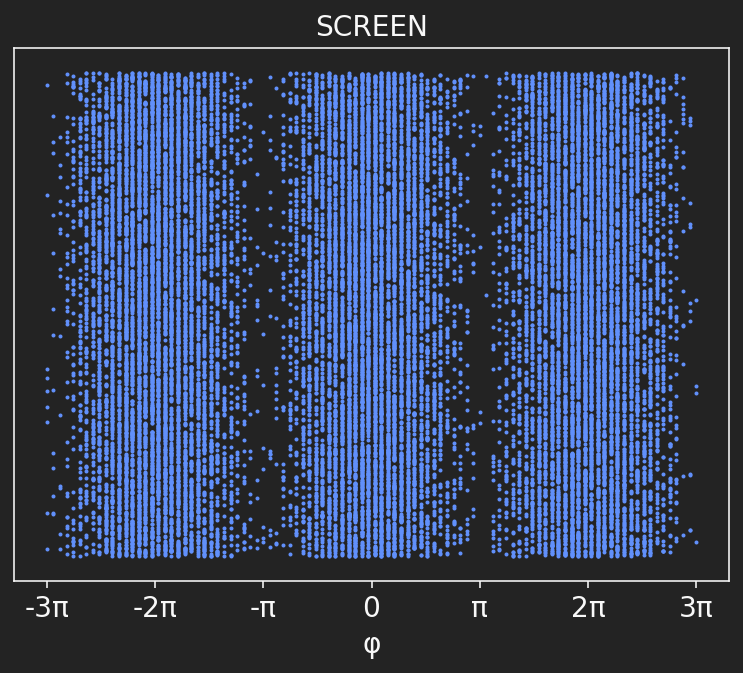

In [28]:
# Emulate hits on a screen. Values of z coordinate are selected at random

plt.scatter(φ_hit,z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()

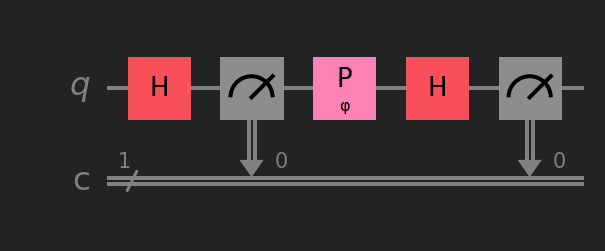

In [29]:
# define quantum circuit equivalent to double-slit experiment WITH measurement after slits

qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.p(φ,0)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

In [30]:
# transpile to circuit that can be ran by simulator

qc_trans = transpile(qc, backend=simulator)

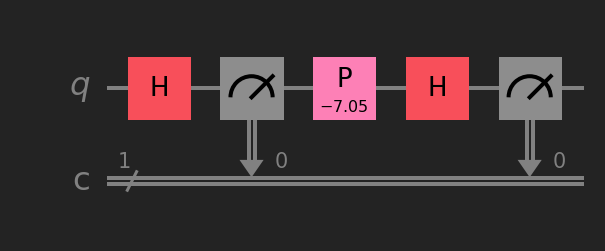

In [31]:
# Create list of circuits for different values of φ selected at random between ±φ_scrn/2

runs = 8192
φ_lst = np.random.uniform(-3*π,3*π,runs)

circuits = []

for φ_val in φ_lst:
    qc_sim = qc_trans.assign_parameters({φ:φ_val})
    circuits.append(qc_sim)
    
circuits[6].draw()

In [32]:
# Execute simulation

job = simulator.run(circuits, shots=1, memory=True)
sim_results = job.result()

In [33]:
# Post-process results: select values of φ where we measured a 0 (i.e., particle hit the screen)

φ_hit = []

for i, circ in enumerate(circuits):
    result = sim_results.get_memory(circ)[0]
    if result == '0':
        φ_hit.append(φ_lst[i])

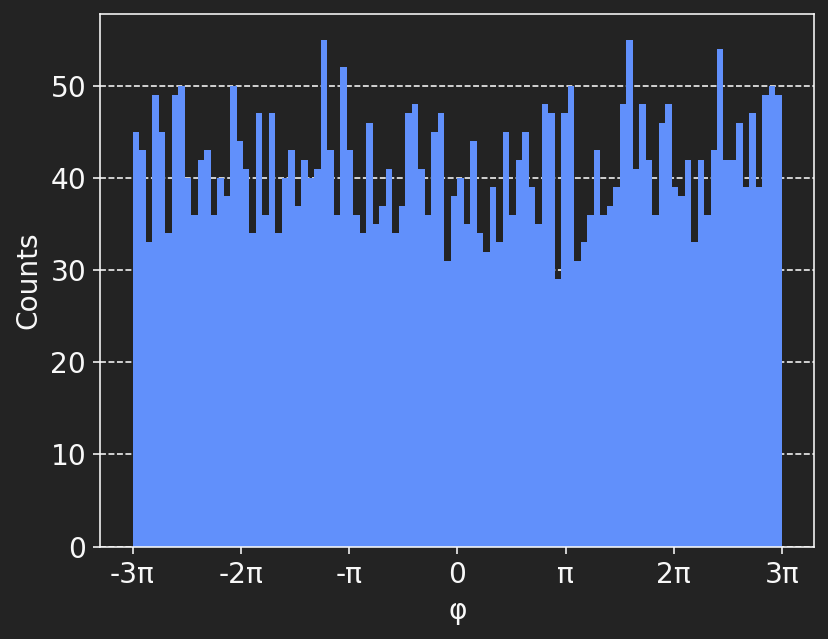

In [34]:
# Emulate hits on a screen. Values of z coordinate are selected at random

ax = plt.subplot()
plt.hist(φ_hit, bins=100, color='#6190fb')
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.ylabel('Counts',fontsize=14)
plt.grid(axis='y',linestyle='dashed')
ax.set_axisbelow(True)
plt.show()

In [35]:
z_hit = np.random.uniform(-1,1,len(φ_hit))

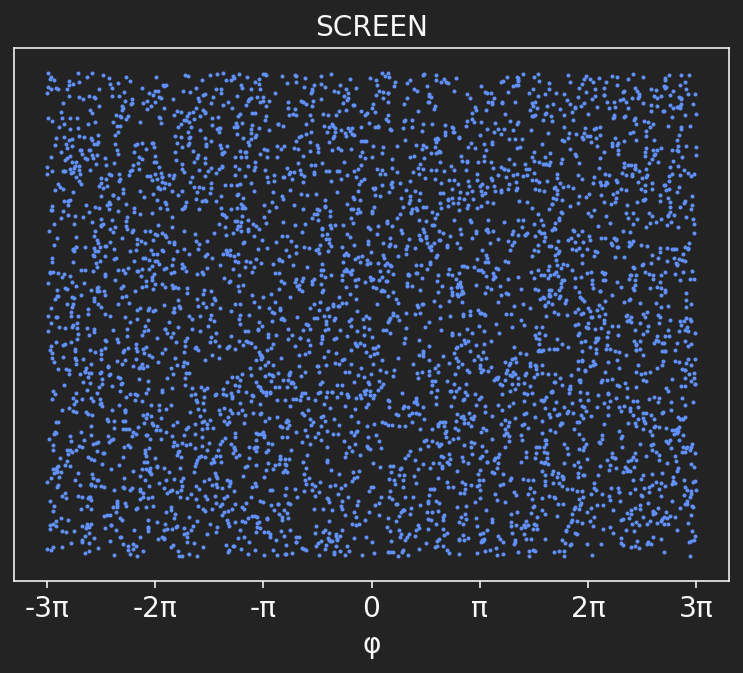

In [36]:
# Emulate hits on a screen. Values of z coordinate are selected at random

plt.scatter(φ_hit,z_hit, s = 1, color='#6190fb')
plt.tick_params(axis='both', left=False, labelleft=False)
plt.xticks(ticks=[-3*π, -2*π, -π, 0, π, 2*π, 3*π],
           labels=['-3π','-2π','-π','0','π','2π','3π'],
           fontsize=14)
plt.xlabel('φ', fontsize=14)
plt.title('SCREEN', fontsize=14)
plt.show()